# Instructions for what to do _before_ running this notebook

* Run file `PSAllModels.py` (located in `C:\Users\maria\MEGAsync\SLCN\models\`). Make sure to set all variables to the right values.
* This will save results similar to `Bbspr_2020_8_3_17_1_humans_n_samples20_map.pickle` (located, e.g., in `C:\Users\maria\MEGAsync\SLCN\PShumanData\fitting\mice`)
* Then run file `MAPResultPlots.py` (located in `C:\Users\maria\MEGAsync\SLCN\models\`). Again, make sure to set all variables to the right values.
* This will create several files in the folder of the original results, e.g., `params_Bbspr_session_388_pymc3.csv` and `nll_bics.csv`
* It will also save files `modelwise_LLs.csv`, `subjwise_LLs.csv`, etc. in the `plots` subfolder in this directory
* Once you have these files, run this notebook here

# Imports

In [1]:
import plotnine as gg
gg.theme_set(gg.theme_classic)
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt

from Functions import load_mouse_data, get_info_from_fullID, add_meta_column

# Directories

In [2]:
base_dir = 'C:/Users/maria/MEGAsync/SLCN'
param_dir = os.path.join(base_dir, 'PShumanData/fitting/mice/')
plot_save_dir = os.path.join(base_dir, 'models/plots/')

In [3]:
winning_model_names = ['Bbspr', 'RLabnp2']

# Plot model fits

In [4]:
model_fits = pd.read_csv(os.path.join(param_dir, 'plots', 'modelwise_LLS.csv'))
model_fits = model_fits.sort_values(by=['WAIC']).reset_index(drop=True)
model_fits

,model_name,slope_variable,n_subj,WAIC,NLL,AIC
0,Bbspr,session,388,119008.281250,57952.140625,119008.281250
1,RLabnp2,session,388,122060.414062,59090.207031,122060.414062


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_WAICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


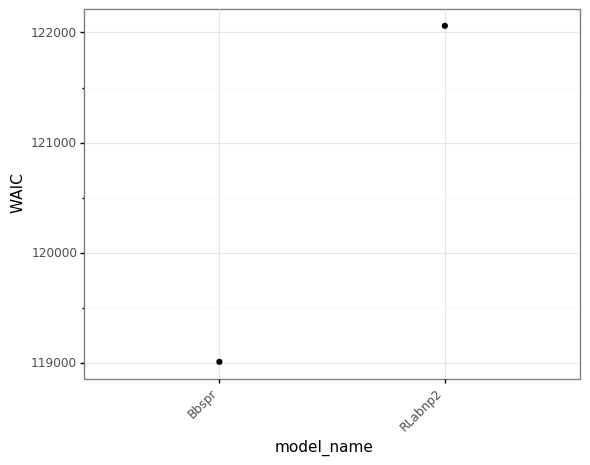

<ggplot: (164604245789)>

In [5]:
g = (gg.ggplot(model_fits, gg.aes('model_name', 'WAIC'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
)
g.save(os.path.join(plot_save_dir, '9_WAICs.png'))
g

In [6]:
fits = pd.read_csv(os.path.join(param_dir, 'plots', 'subjwise_LLs.csv'))
fits = fits.drop(columns=['slope_variable', 'n_subj'])
fits

,model_name,n_params,1404012,1404112,1404212,1404312,1404412,1404512,1404612,1404712,...,1307221,1307421,1307521,1307621,1307721,1307921,1308021,1308121,1308221,1308321
0,Bbspr,4,-131.080353,-186.260559,-206.265091,-121.792435,-107.015137,-144.417267,-162.083847,-92.157608,...,-150.563690,-159.707855,-202.225708,-116.357605,-128.804459,-117.056396,-171.827682,-135.416748,-138.845764,-153.011917
1,RLabnp2,5,-131.419678,-187.023468,-207.643036,-120.632713,-105.597076,-146.123184,-163.845535,-94.737640,...,-152.942093,-163.297104,-201.803833,-119.480209,-132.683533,-119.656395,-174.612061,-135.659103,-143.314774,-155.043045


In [7]:
# Melt
fits_ = pd.melt(fits, id_vars=['model_name', 'n_params'], var_name='fullID', value_name='LL')

# Add BIC and AIC
n_trials = 725
for row in range(len(fits_)):
    fits_.loc[row, 'AIC'] = 2 * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']
    fits_.loc[row, 'BIC'] = np.log(n_trials) * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']

# Add animal id, age, gender
animal_colnames = ['fullID', 'agegroup', 'sex', 'age', 'animal']
for col in animal_colnames[1:]:
    fits_[col] = fits_.fullID.apply(get_info_from_fullID, column_name=col)
fits_

,model_name,n_params,fullID,LL,AIC,BIC,agegroup,sex,age,animal
0,Bbspr,4,1404012,-131.080353,270.160706,288.505392,Juvenile,Male,40,14
1,RLabnp2,5,1404012,-131.419678,272.839355,295.770214,Juvenile,Male,40,14
2,Bbspr,4,1404112,-186.260559,380.521118,398.865805,Juvenile,Male,41,14
3,RLabnp2,5,1404112,-187.023468,384.046936,406.977794,Juvenile,Male,41,14
4,Bbspr,4,1404212,-206.265091,420.530182,438.874869,Juvenile,Male,42,14
...,...,...,...,...,...,...,...,...,...,...
771,RLabnp2,5,1308121,-135.659103,281.318207,304.249065,Adult,Female,81,13
772,Bbspr,4,1308221,-138.845764,285.691528,304.036215,Adult,Female,82,13
773,RLabnp2,5,1308221,-143.314774,296.629547,319.560405,Adult,Female,82,13
774,Bbspr,4,1308321,-153.011917,314.023834,332.368521,Adult,Female,83,13


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_LLs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_BICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\

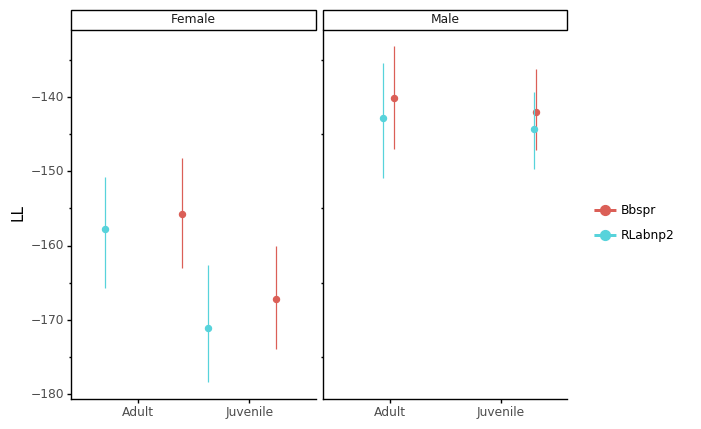

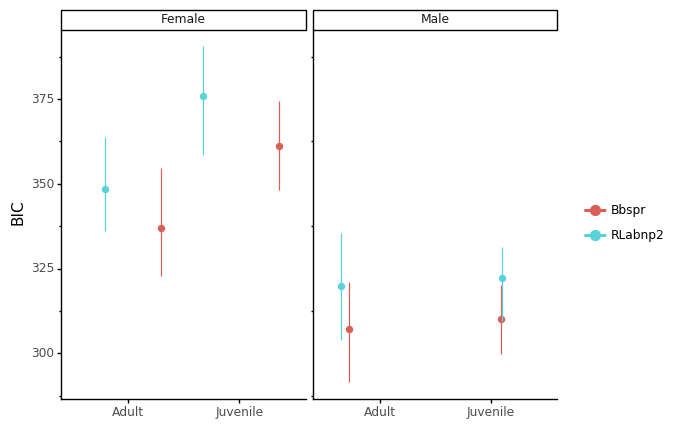

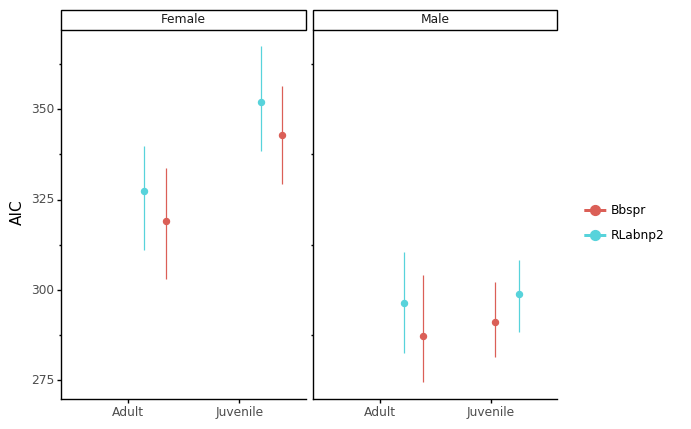

In [8]:
for yax in ['LL', 'BIC', 'AIC']:
    g = (gg.ggplot(fits_, gg.aes('factor(agegroup)', yax, color='model_name'))
     + gg.stat_summary(position='jitter')
     + gg.facet_wrap('~ sex')
     + gg.labs(x='', color='')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, '9_{}s.png'.format(yax)))

In [9]:
# Get AICs
AICs = fits_.pivot_table(columns='model_name', index=animal_colnames, values='AIC')

for col in AICs.columns:
    if 'RL' in col:
        ref_col = winning_model_names[1]
    elif 'B' in col:
        ref_col = winning_model_names[0]
    elif 'WSLS' in col:
        ref_col = winning_model_names[0]
    AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]
ref_col, col = winning_model_names
AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]

# AIC differences
AICs_rel = AICs.drop(columns=[col for col in AICs.columns if
                              (not 'minus' in col) and (not col=='sex') and (not col=='agegroup')])
AICs_rel = AICs_rel.reset_index()
AICs_rel = AICs_rel.melt(id_vars=animal_colnames, value_name='AIC')
AICs_rel

,fullID,agegroup,sex,age,animal,model_name,AIC
0,1007421,Adult,Female,74,10,Bbspr_minus_Bbspr,0.000000
1,1007521,Adult,Female,75,10,Bbspr_minus_Bbspr,0.000000
2,1007621,Adult,Female,76,10,Bbspr_minus_Bbspr,0.000000
3,1007721,Adult,Female,77,10,Bbspr_minus_Bbspr,0.000000
4,1007821,Adult,Female,78,10,Bbspr_minus_Bbspr,0.000000
...,...,...,...,...,...,...,...
1159,908021,Adult,Female,80,9,RLabnp2_minus_Bbspr,1.798126
1160,908121,Adult,Female,81,9,RLabnp2_minus_Bbspr,12.324493
1161,908221,Adult,Female,82,9,RLabnp2_minus_Bbspr,21.141479
1162,908321,Adult,Female,83,9,RLabnp2_minus_Bbspr,20.129303


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/9_RelativeAICs2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


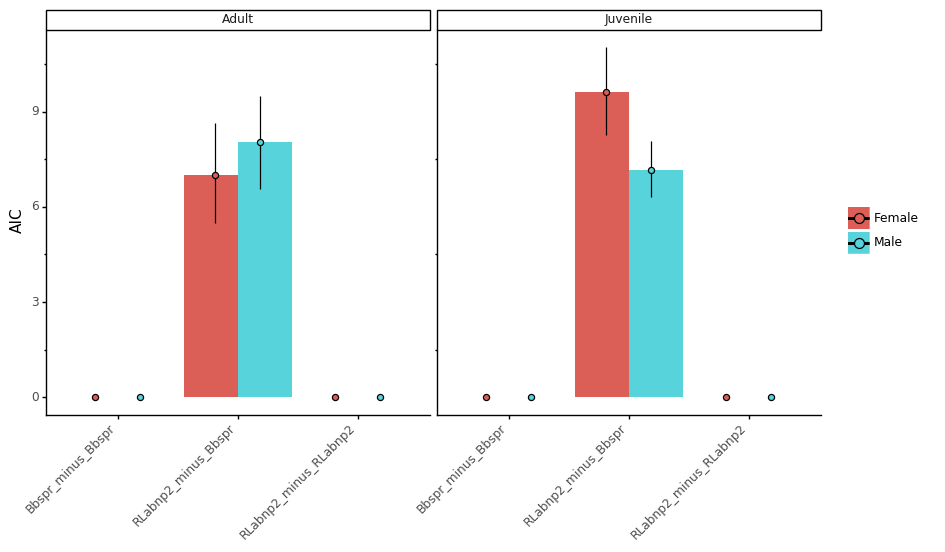

In [10]:
# Plot AIC differences
gg.options.figure_size = (10, 5)
g = (gg.ggplot(AICs_rel, gg.aes('model_name', 'AIC', fill='sex'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(position=gg.position_dodge(width=0.75))
#  + gg.geom_point()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
 + gg.labs(x='', fill='')
 + gg.facet_grid('~ agegroup')
)
g.draw()
g.save(os.path.join(plot_save_dir, '9_RelativeAICs2.png'))

# Load fitted parameters

In [11]:
# Load
all_params = pd.DataFrame()
for file in os.listdir(param_dir):
    if ('csv' in file) and ('nll' not in file):
        
        new_params = pd.read_csv(os.path.join(param_dir, file))
        new_params['agegroup'] = new_params.sID.apply(get_info_from_fullID, column_name='agegroup')
        all_params = all_params.append(new_params)

# Preprocess        
all_params['agegroup'] = pd.Categorical(all_params['agegroup'], ordered=True, categories=('Juvenile', 'Adult'))
# all_params = all_params.rename(columns={'Gender': 'sex', 'PreciseYrs': 'age'})
all_params['meta'] = add_meta_column(all_params)
all_params = all_params.drop(columns=
                             ['PDS', 'T1', 'cnalpha_rew', 'p_noisy', 'slope_variable', 'fullID', 'age_z'])
all_params = all_params.loc[all_params.meta != 'nan']
# all_params.beta /= 15
all_params

,age,agegroup,alpha,animal,beta,bias,calpha,cnalpha,model,nalpha,p_reward,p_switch,persev,sID,session,sex,meta
0,40,Juvenile,NaN,14,4.389945,0.0,NaN,NaN,Bbspr,NaN,0.717074,0.241321,0.225830,1404012,0.0,Male,1-3
1,41,Juvenile,NaN,14,6.004984,0.0,NaN,NaN,Bbspr,NaN,0.392984,0.327323,0.085838,1404112,1.0,Male,1-3
2,42,Juvenile,NaN,14,1.365572,0.0,NaN,NaN,Bbspr,NaN,0.999528,0.001779,0.529016,1404212,2.0,Male,1-3
3,43,Juvenile,NaN,14,14.864764,0.0,NaN,NaN,Bbspr,NaN,0.773911,0.344761,0.100804,1404312,3.0,Male,4-8
4,44,Juvenile,NaN,14,10.130197,0.0,NaN,NaN,Bbspr,NaN,0.536444,0.282478,0.067903,1404412,4.0,Male,4-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,79,Adult,0.925394,13,2.507167,0.0,0.925394,0.536272,RLabnp2,0.536272,NaN,NaN,0.813097,1307921,5.0,Female,4-8
384,80,Adult,0.865945,13,1.868168,0.0,0.865945,0.785003,RLabnp2,0.785003,NaN,NaN,0.942595,1308021,6.0,Female,4-8
385,81,Adult,0.740061,13,2.655522,0.0,0.740061,0.460554,RLabnp2,0.460554,NaN,NaN,0.553051,1308121,7.0,Female,4-8
386,82,Adult,0.985089,13,2.708668,0.0,0.985089,0.502293,RLabnp2,0.502293,NaN,NaN,0.525880,1308221,8.0,Female,9-11


In [12]:
animal_colnames = ['sID', 'session', 'agegroup', 'sex', 'age', 'animal', 'meta']
all_params_long = pd.melt(all_params, id_vars=animal_colnames + ['model'],
                          var_name='param_name', value_name='param_value')
all_params_long = all_params_long[all_params_long.param_value != 0]
# all_params_long = add_meta_column(all_params_long)
all_params_long

,sID,session,agegroup,sex,age,animal,meta,model,param_name,param_value
0,1404012,0.0,Juvenile,Male,40,14,1-3,Bbspr,alpha,NaN
1,1404112,1.0,Juvenile,Male,41,14,1-3,Bbspr,alpha,NaN
2,1404212,2.0,Juvenile,Male,42,14,1-3,Bbspr,alpha,NaN
3,1404312,3.0,Juvenile,Male,43,14,4-8,Bbspr,alpha,NaN
4,1404412,4.0,Juvenile,Male,44,14,4-8,Bbspr,alpha,NaN
...,...,...,...,...,...,...,...,...,...,...
6979,1307921,5.0,Adult,Female,79,13,4-8,RLabnp2,persev,0.813097
6980,1308021,6.0,Adult,Female,80,13,4-8,RLabnp2,persev,0.942595
6981,1308121,7.0,Adult,Female,81,13,4-8,RLabnp2,persev,0.553051
6982,1308221,8.0,Adult,Female,82,13,9-11,RLabnp2,persev,0.525880


# Plotting functions

In [13]:
def subset_model_data(data, model_name):
    
    win_mod_sub = data.model == model_name
    not_nan_sub = np.invert(np.isnan(data.loc[win_mod_sub, 'param_value']))
    sub_dat = data[np.logical_and(win_mod_sub, not_nan_sub)]

    return sub_dat

# # Example use
# plotted_model_name = winning_model_names[0]
# sub_dat = subset_model_data(all_params_long, plotted_model_name)

In [14]:
def plot_session_params(data, winning_model_name):

    gg.options.figure_size = (8, 5)
    
    # Plot
    g = (gg.ggplot(sub_dat, gg.aes('session', 'param_value', color='agegroup'))
     + gg.geom_point(alpha=0.5)
     + gg.geom_smooth()
#      + gg.coord_cartesian(xlim=(0, 12))
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.labs(y='')
     + gg.facet_wrap('~ sex + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
    )

    save_dir = os.path.join(plot_save_dir, '10_ParamsSession_{}.png'.format(winning_model_name))
    print("Saving to {}".format(save_dir))
    g.save(save_dir)
    gg.options.figure_size = (5, 5)

    
    return g
    
# # Example use
# plot_session_params(sub_dat, plotted_model_name)

In [15]:
def plot_meta_params(data, winning_model_name):

    # Males only
    sub_dat_male = data[data.sex == 'Male']
    g_male = (gg.ggplot(sub_dat_male, gg.aes('meta', 'param_value', fill='agegroup'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.9))
#      + gg.coord_cartesian(ylim=(0, 1))  # adapt for BF (0, 0.8) vs RL (0, 1)
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1),
                legend_position='none')
     + gg.labs(x='', y='')
     + gg.facet_wrap('~ agegroup + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
#      + gg.facet_grid('agegroup ~ param_name')
    )
    g_male.save(os.path.join(plot_save_dir, '11_ParamsMetaMale_{}.png'.format(winning_model_name)))
    
    # Females only
    g_female = g_male
    g_female.data = data[data.sex == 'Female']
    g_female.save(os.path.join(plot_save_dir, '11_ParamsMetaFemale_{}.png'.format(winning_model_name)))
    
    return g_female
    
# # Example use
# plot_meta_params(sub_dat, plotted_model_name)

In [16]:
def plot_agegroup_params(data, winning_model_name):

    ## Males only
    sub_dat_male = data[data.sex == 'Male']
    g_m = (gg.ggplot(sub_dat_male, gg.aes('agegroup', 'param_value', fill='agegroup'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge)
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1),
                legend_position='none')
#      + gg.coord_cartesian(ylim=(-0.1, 1))
     + gg.labs(x='', y='')
     + gg.facet_wrap('~ meta + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
#      + gg.facet_grid('meta ~ param_name')
    )
    g_m.draw()
    g_m.save(os.path.join(plot_save_dir, '12_ParamsAgegroupMale_{}.png'.format(winning_model_name)))
    
    ## Females only
    g_f = g_m
    g_f.data = data[data.sex == 'Female']
    g_f.draw()
    g_f.save(os.path.join(plot_save_dir, '12_ParamsAgegroupFemale_{}.png'.format(winning_model_name)))
    
# # Example use
# plot_agegroup_params(sub_dat, plotted_model_name)

In [17]:
def plot_age_params(data, winning_model_name, file_name_sub=''):

    g = (gg.ggplot(data, gg.aes('age', 'param_value', color='sex'))
     + gg.geom_point()
     + gg.geom_smooth(color='black')
#      + gg.facet_grid('sex ~ param_name')
     + gg.facet_wrap('~ sex + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
     + gg.labs(x='Age', y='')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, '13_ParamsAge_{}{}.png'.format(winning_model_name, file_name_sub)))
    
# # Example use
# plot_age_params(sub_dat, plotted_model_name)

## Plot winning models

In [ ]:
for plotted_model_name in winning_model_names:

    # Subset model data
    win_mod_sub = all_params_long.model == plotted_model_name
    not_nan_sub = np.invert(np.isnan(all_params_long.loc[win_mod_sub, 'param_value']))
    sub_dat = all_params_long[np.logical_and(win_mod_sub, not_nan_sub)]
    
    # Plot
    gg.options.figure_size = (5, 4)
    plot_session_params(sub_dat, plotted_model_name)
    plot_meta_params(sub_dat, plotted_model_name)
    plot_agegroup_params(sub_dat, plotted_model_name)
    plot_age_params(sub_dat, plotted_model_name)

Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_Bbspr.png


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 8 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_Bbspr.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/11_ParamsMetaMale_Bbspr.png
  warn('Filename: {}'.format(fil

# Parameter correlations between models

In [ ]:
BF_params = all_params[all_params.model == winning_model_names[0]]
RL_params = all_params[all_params.model == winning_model_names[1]]
RL_params

winning_params = RL_params.drop(columns=['model']).merge(
    BF_params.drop(columns=['model']), on=animal_colnames, suffixes=['_RL', '_BF'])
winning_params = winning_params.drop(columns=[
    'alpha_BF', 'calpha_BF', 'cnalpha_BF', 'nalpha_BF', 'p_reward_RL', 'p_switch_RL', 'bias_BF'])
winning_params

In [ ]:
# Compute the correlation matrix
corr = winning_params.drop(columns=['animal', 'fullID', 'sID']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig(os.path.join(plot_save_dir, '14_CorrelationMatrix.png'))

## Stats on parameter differences

In [ ]:
import statsmodels.formula.api as smf

all_models = pd.DataFrame()

for param in ['alpha_RL', 'beta_RL', 'bias_RL', 'calpha_RL', 'cnalpha_RL', 'nalpha_RL', 'persev_RL',
              'beta_BF', 'p_reward_BF', 'p_switch_BF', 'persev_BF']:
    mod = smf.ols(
        formula='{} ~ (session + Gender + age_group) * (session + Gender + age_group)'.format(param),
        data=winning_params).fit()
    
    p = pd.DataFrame(mod.pvalues, columns=['p'])
    c = pd.DataFrame(mod.params, columns=['coef'])
    c['param'] = param

    mod_dat = p.merge(c, left_index=True, right_index=True)
    mod_dat
    
    all_models = all_models.append(mod_dat)

all_models['sig'] = ['sig' if p > 0.05 else 'ns' for p in all_models.p]
all_models = all_models.reset_index()
all_models = all_models.replace({
#     'Gender[T.Male]': 'Sex', 'PreciseYrs': 'Age', 'PreciseYrs:Gender[T.Male]': 'Interaction'
#     'Gender[T.Male]': 'Sex', 'session:Gender[T.Male]': 'Interaction'
    'Gender[T.Male]': 'Sex', 'session': 'Session', 'age_group[T.adult]': 'Agegroup',
    'Gender[T.Male]:age_group[T.adult]': 'Sex:Agegroup',
    'session:Gender[T.Male]': 'Session:Sex',
    'session:age_group[T.adult]': 'Session:Agegroup'
})
all_models = all_models.rename(columns={'index': 'effect'})
all_models.effect = pd.Categorical(all_models.effect, ordered=True,
#                                    categories=['Age', 'Sex', 'Interaction', 'Intercept']
#                                    categories=['session', 'Sex', 'Interaction', 'Intercept']
                                   categories=['Session', 'Agegroup', 'Sex',
                                               'Session:Agegroup', 'Session:Sex', 'Sex:Agegroup',
                                               'Intercept']
                                  )
all_models

In [ ]:
g = (gg.ggplot(all_models, gg.aes('param', 'coef', fill='sig', color='sig'))#, color='param'))
     + gg.geom_bar(stat='identity')
     + gg.scale_fill_manual(values=['white', 'darkgrey'])
     + gg.scale_color_manual(values=['lightgrey', 'black'])
     + gg.theme_bw()
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.labs(x='')
     + gg.facet_wrap('~ effect', scales='free')
)
g.save(os.path.join(plot_save_dir, 'RegrModels.png'))
g.draw()

# Plot all models

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAge.png'))

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsSession.png'))

In [ ]:
g = (gg.ggplot(all_params_long,
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAgegroup.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.stat_summary()
 + gg.theme_bw()
 + gg.facet_grid('age_group~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession2.png'))

# Gen Rec

## WSLS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)